In [1]:
library(ggplot2)
library(dplyr)
library(lme4)
library(lmerTest)
library(xtable)
library(glmmTMB)
library(cowplot)
library(grid)

pallete = c("#318480", "#b4464f")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: Matrix

Attaching package: 'lmerTest'

The following object is masked from 'package:lme4':

    lmer

The following object is masked from 'package:stats':

    step


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



# Bock 1992

In [2]:
b92_df <- read.csv("../evalsets/Bock1992/items.csv.reformat")
b92_df <- tidyr::separate(b92_df, condition, c("nums","clause"), sep="_")
b92_df <- tidyr::separate(b92_df, nums, c("subj", "attr"), sep=1:2)

b92_df$type <- substr(b92_df$model, 0, 4)
b92_df$match <- b92_df$subj == b92_df$attr
b92_df$subj <- as.factor(b92_df$subj)

b92_df$sample <- 100 - b92_df$sample

b92_df$max <- 100 - b92_df$max
subset(b92_df, type=="lstm")

means <- b92_df %>% group_by(model, type, match, clause) %>% summarize(sample = mean(sample), max = mean(max))

means_na <- b92_df %>% group_by(model, type, match, subj) %>% summarize(sample = mean(sample), max = mean(max))

subset(means, type=="lstm")


,X,item,subj,attr,clause,model,max,sample,type,match
,<int>,<int>,<fct>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<chr>,<lgl>
1,0,0,s,s,prop,lstm0,0,7.152157,lstm,TRUE
2,1,0,s,s,prop,lstm1,0,4.364319,lstm,TRUE
3,2,0,s,s,prop,lstm2,0,1.543578,lstm,TRUE
4,3,0,s,s,prop,lstm3,0,2.585193,lstm,TRUE
5,4,0,s,s,prop,lstm4,0,3.907990,lstm,TRUE
11,10,0,s,s,rc,lstm0,0,3.112181,lstm,TRUE
12,11,0,s,s,rc,lstm1,0,2.950354,lstm,TRUE
13,12,0,s,s,rc,lstm2,0,2.971619,lstm,TRUE
14,13,0,s,s,rc,lstm3,0,1.454867,lstm,TRUE


model,type,match,clause,sample,max
<fct>,<chr>,<lgl>,<chr>,<dbl>,<dbl>
lstm0,lstm,FALSE,prop,17.009018,3.1250
lstm0,lstm,FALSE,rc,12.463757,1.5625
lstm0,lstm,TRUE,prop,3.893529,0.0000
lstm0,lstm,TRUE,rc,3.867605,0.0000
lstm1,lstm,FALSE,prop,28.219312,12.5000
lstm1,lstm,FALSE,rc,17.510046,1.5625
lstm1,lstm,TRUE,prop,4.994438,0.0000
lstm1,lstm,TRUE,rc,3.579478,0.0000
lstm2,lstm,FALSE,prop,23.531391,10.9375


In [3]:
output <- b92_df %>% group_by("Model Type"=type, "Subject #"=subj, "Attractor #"=attr, "Modifier Type"=clause) %>% summarize("Sample"=mean(sample), "MaxProb"=mean(max))

output["Modifier Type"][output["Modifier Type"] == "prop"] <- c("pp", "pp", "pp", "pp")
output
print.xtable(xtable(output), file="Bock92Table.tex", floating=FALSE)

Model Type,Subject #,Attractor #,Modifier Type,Sample,MaxProb
<chr>,<fct>,<chr>,<chr>,<dbl>,<dbl>
lstm,p,p,pp,5.208455,0.000
lstm,p,p,rc,6.106613,0.000
lstm,p,s,pp,20.296631,6.875
lstm,p,s,rc,16.559788,5.625
lstm,s,p,pp,31.375668,16.875
lstm,s,p,rc,22.384020,7.500
lstm,s,s,pp,4.396412,0.000
lstm,s,s,rc,3.364288,0.000
rnng,p,p,pp,25.145784,25.000


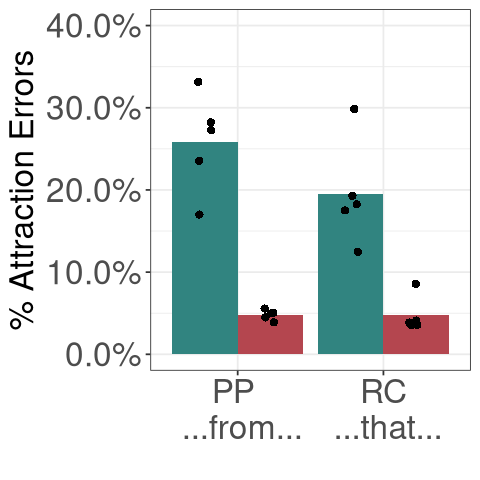

In [4]:
options(repr.plot.width=4, repr.plot.height=4)
f <- ggplot(subset(b92_df, type=="lstm"), aes(x=clause, fill=match, y=sample/100)) + 
geom_bar(stat="summary", position="dodge", fun.y = "mean") + 
geom_point(data=subset(means, type=="lstm"), shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.1, dodge.width=0.9)) +
labs(x="", y="% Attraction Errors", fill="") +
theme_bw() +
scale_fill_manual(labels=c("Subj-Attr Mismatch \n  ...singers...", 
                        "Subj-Attr Match \n ...singer..."), values=pallete) +
scale_x_discrete(labels=c("PP \n ...from...", "RC\n ...that...")) +
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,0.40)) +
theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))
legend <- cowplot::get_legend(f)
f <-f + theme(legend.position = "none")
f
ggsave("Bock92_lstm.png", width=4, height=4)

In [5]:
options(repr.plot.width=3, repr.plot.height=2)
grid.newpage()
png("bock92_legend.png", width=3, height=2, units="in", res=300)
grid.draw(legend) 
dev.off()

png 
  2

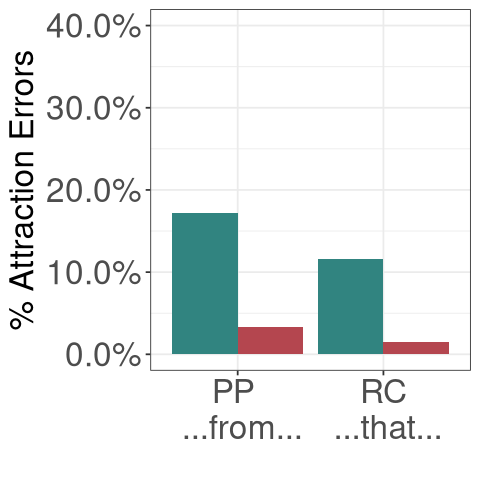

In [6]:
options(repr.plot.width=4, repr.plot.height=4)


b92_human <- data.frame(mod=c("PP", "PP", "PP", "PP", "RC", "RC", "RC","RC"),
                        attr=c("Mismatch", "Mismatch", "Match", "Match", "Match", "Match", "Mismatch", "Mismatch"),
                        local=c("S","P", "S", "P", "S", "P", "S","P"),
                        err=c(8/188, 29/169, 3/187,6/180, 1/209, 3/199, 3/180, 22/189)
                       )
b92_human$attr <- with(b92_human, factor(attr, levels=rev(levels(attr))))


ggplot(data=b92_human, aes(x=mod, y=err, fill=attr)) +
geom_bar(stat="identity", position="dodge") +
labs(x="", y="% Attraction Errors", fill="") +
theme_bw() +
scale_fill_manual(labels=c("Subj-Attr Mismatch \n  ...singers...", 
                        "Subj-Attr Match \n ...singer..."), values=pallete) +
scale_x_discrete(labels=c("PP \n ...from...", "RC\n ...that...")) +
scale_y_continuous(labels=scales::percent) +
theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))+
coord_cartesian(ylim = c(0,0.4)) +
theme(legend.position = "none") 

ggsave("Bock92_human.png", width=4, height=4)

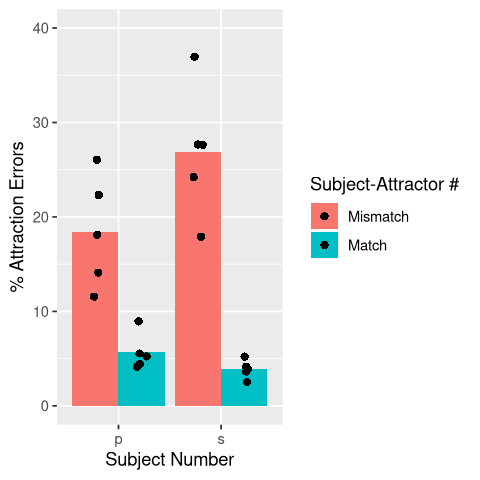

In [7]:
ggplot(subset(b92_df, type=="lstm"), aes(x=subj, fill=match, y=sample)) + 
geom_bar(stat="summary", position="dodge", fun.y = "mean") + 
geom_point(data=subset(means_na, type=="lstm"), shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.1, dodge.width=0.9)) +
labs(x="Subject Number", y="% Attraction Errors", fill="Subject-Attractor #") +
scale_fill_hue(labels=c("Mismatch", "Match")) +
coord_cartesian(ylim = c(0,40)) +
ylim(0,100) 
ggsave("B92_na_lstm.png", width=5, height=4)

Saving 6.67 x 6.67 in image


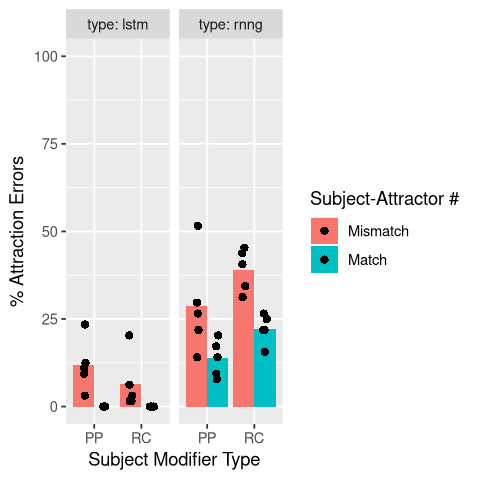

In [8]:
ggplot(b92_df, aes(x=clause, fill=match, y=max)) + 
geom_bar(stat="summary", position="dodge", fun.y = "mean") + 
geom_point(data=means, shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.1, dodge.width=0.9)) +
labs(x="Subject Modifier Type", y="% Attraction Errors", fill="Subject-Attractor #") +
facet_grid( ~type, labeller = label_both) +
scale_fill_hue(labels=c("Mismatch", "Match")) +
scale_x_discrete(labels=c("PP", "RC")) +
ylim(0,100)
ggsave("B92_pprc_both_max.png")

In [9]:
b92_lm <- glmmTMB(data=subset(b92_df, type=="lstm"), 
                  sample/100 ~ subj * match * clause + (1 | item) + (1 | model),
                 family=beta_family())
summary(b92_lm)

b92_lm <- glmmTMB(data=subset(b92_df, type=="rnng"), 
               sample/100 ~ match * clause + (1 | item) + (1 | model),
               family=beta_family())
summary(b92_lm)

 Family: beta  ( logit )
Formula:          sample/100 ~ subj * match * clause + (1 | item) + (1 | model)
Data: subset(b92_df, type == "lstm")

     AIC      BIC   logLik deviance df.resid 
 -3342.5  -3285.8   1682.3  -3364.5     1269 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.10858  0.3295  
 model  (Intercept) 0.06423  0.2534  
Number of obs: 1280, groups:  item, 32; model, 5

Overdispersion parameter for beta family (): 13.3 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -1.45888    0.13736 -10.621  < 2e-16 ***
subjs                     0.62664    0.06811   9.200  < 2e-16 ***
matchTRUE                -1.23035    0.08543 -14.401  < 2e-16 ***
clauserc                 -0.23183    0.07327  -3.164  0.00156 ** 
subjs:matchTRUE          -0.67892    0.11687  -5.809 6.28e-09 ***
subjs:clauserc           -0.23132    0.09873  -2.343  0.01913 *  
matchTRUE:clauserc        0.340

 Family: beta  ( logit )
Formula:          sample/100 ~ match * clause + (1 | item) + (1 | model)
Data: subset(b92_df, type == "rnng")

     AIC      BIC   logLik deviance df.resid 
 -1879.3  -1843.2    946.6  -1893.3     1273 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.07577  0.2753  
 model  (Intercept) 0.02597  0.1611  
Number of obs: 1280, groups:  item, 32; model, 5

Overdispersion parameter for beta family (): 1.15 

Conditional model:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -0.51221    0.11085  -4.621 3.83e-06 ***
matchTRUE          -0.65994    0.09534  -6.922 4.45e-12 ***
clauserc            0.27453    0.09748   2.816  0.00486 ** 
matchTRUE:clauserc -0.04815    0.13533  -0.356  0.72200    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [10]:
b92_lm <- glmmTMB(data=subset(b92_df, type=="rnng" & clause=="rc"), 
                  sample/100 ~ match + (1 | item) + (1 | model), family=beta_family())
rnng_rc_eff <- -summary(b92_lm)$coeff$cond[2,1]
rnng_rc_se <- summary(b92_lm)$coeff$cond[2,2]

b92_lm <- glmmTMB(data=subset(b92_df, type=="lstm" & clause=="rc"), sample/100 ~ match + (1 | item) + (1 | model), family=beta_family())
lstm_rc_eff <- -summary(b92_lm)$coeff$cond[2,1]
lstm_rc_se <- summary(b92_lm)$coeff$cond[2,2]

b92_lm <- glmmTMB(data=subset(b92_df, type=="rnng" & clause=="prop"), sample/100 ~ match + (1 |item) + (1 | model), family=beta_family())
rnng_pp_eff <- -summary(b92_lm)$coeff$cond[2,1]
rnng_pp_se <- summary(b92_lm)$coeff$cond[2,2]

b92_lm <- glmmTMB(data=subset(b92_df, type=="lstm" & clause=="prop"), sample/100 ~ match + (1 | item) + (1 | model), family=beta_family())
lstm_pp_eff <- -summary(b92_lm)$coeff$cond[2,1]
lstm_pp_se <- summary(b92_lm)$coeff$cond[2,2]

b92_effs <- data.frame(type=c("rnng", "lstm", "rnng", "lstm"), clause=c("RC", "RC", "PP", "PP"), 
                       eff=c(rnng_rc_eff, lstm_rc_eff, rnng_pp_eff, lstm_pp_eff),
                       se=c(rnng_rc_se, lstm_rc_se, rnng_pp_se, lstm_pp_se))
b92_effs

type,clause,eff,se
<fct>,<fct>,<dbl>,<dbl>
rnng,RC,0.6839065,0.09935265
lstm,RC,1.3141481,0.06275589
rnng,PP,0.6933076,0.09534781
lstm,PP,1.5031072,0.06574536


expression(beta)

[1] 0.6839065 1.3141481 0.6933076 1.5031072

Saving 6.67 x 6.67 in image


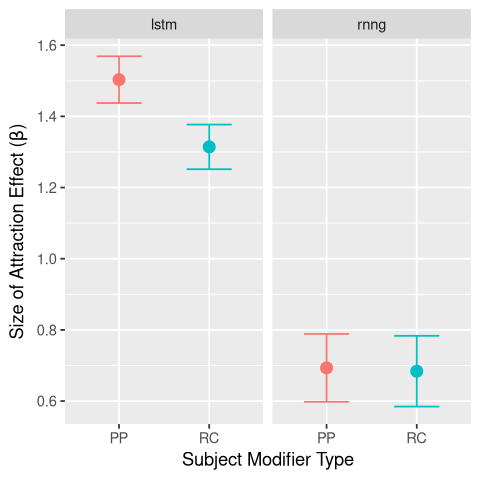

In [11]:
ggplot(b92_effs, aes(y=eff, x = clause, color=clause)) + 
facet_grid( ~ type) +
geom_point(stat="identity", size=3) +
geom_errorbar(aes(ymax=se+eff, ymin=-se+eff), width=0.5) +
theme(legend.position = "none") +
labs(x = "Subject Modifier Type", y = expression(paste("Size of Attraction Effect (", beta, ")")))

expression(beta)
b92_effs$eff

ggsave("B92_effectsize.png")

# Haskell & Macdonald 2011

In [12]:
hm_df <- read.csv("../evalsets/HaskellMacdonald2011/items.csv.reformat")

hm_df$type <- substr(hm_df$model,0, 4)
hm_df

X,item,condition,model,max,sample,type
<int>,<int>,<fct>,<fct>,<int>,<dbl>,<chr>
0,0,SP,lstm0,100,90.77426,lstm
1,0,SP,lstm1,100,64.30393,lstm
2,0,SP,lstm2,100,94.78336,lstm
3,0,SP,lstm3,100,93.06481,lstm
4,0,SP,lstm4,100,97.82278,lstm
5,0,SP,rnng0,100,99.89563,rnng
6,0,SP,rnng1,100,99.33674,rnng
7,0,SP,rnng2,100,98.32687,rnng
8,0,SP,rnng3,100,98.99103,rnng


In [13]:
output <- hm_df %>% group_by("Model Type"=type, "Order"=condition) %>% summarize("Sample"=mean(sample), "MaxProb" = mean(max))

output

print.xtable(xtable(output), file="HaskellTable.tex", floating=FALSE)

Model Type,Order,Sample,MaxProb
<chr>,<fct>,<dbl>,<dbl>
lstm,PS,74.67359,85.5
lstm,SP,80.85981,92.5
rnng,PS,69.52801,76.0
rnng,SP,70.40576,71.0


Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Saving 6.67 x 6.67 in image


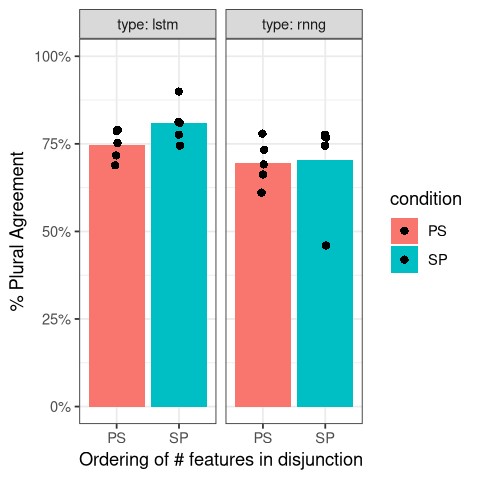

In [14]:
means <- hm_df %>% group_by(model, condition, type) %>% summarize(sample = mean(sample), max = mean(max))


ggplot(hm_df, aes(x=condition, fill=condition, y=sample/100)) + 
geom_bar(stat="summary", position="dodge", fun.y = "mean") + 
geom_point(data=means, shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.1, dodge.width=0.9)) + 
facet_grid( ~type, labeller = label_both) +
labs(x="Ordering of # features in disjunction", y="% Plural Agreement") +
theme(legend.position="none") +
ylim(0,1) +
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,1)) +
theme_bw()

ggsave("Haskell_order.png")

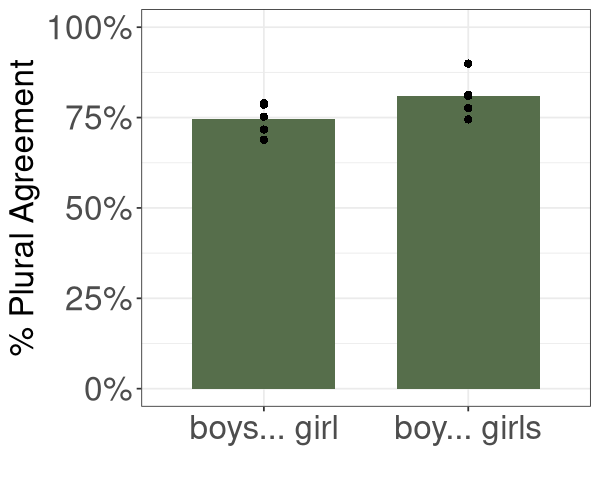

In [15]:
options(repr.plot.width=5, repr.plot.height=4)


means <- hm_df %>% group_by(model, condition, type) %>% summarize(sample = mean(sample), max = mean(max))


ggplot(subset(hm_df, type=="lstm"), aes(x=condition, y=sample/100)) + 
geom_bar(stat="summary", position="dodge", fun.y = "mean", fill="#566e4b", width=0.7) + 
geom_point(data=subset(means, type=="lstm"), shape=16, size=2) +
labs(x="", y="% Plural Agreement") +
theme_bw() + 
scale_x_discrete(labels=c("boys... girl", "boy... girls")) + 
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,1)) +
theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))+
theme(legend.position = "none")

ggsave("Haskell_lstm.png", width= 5, height = 4)

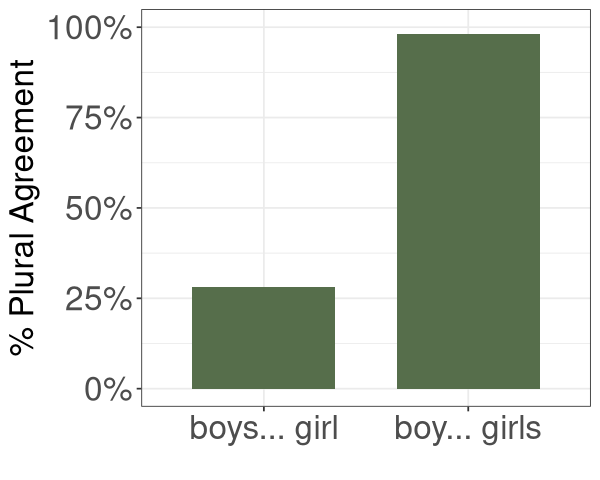

In [16]:
options(repr.plot.width=5, repr.plot.height=4)


hm_human <- data.frame(order=c("SP", "PS"),
                            plural=c(98, 28)/100)

ggplot(hm_human, aes(x=order, y=plural)) +
labs(x="Ordering of # features in disjunction", y="% Plural Agreement") +
labs(x="", y="% Plural Agreement") +
scale_x_discrete(labels=c("boys... girl", "boy... girls")) + 
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,1)) +
theme_bw() +
theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))+
theme(legend.position = "none") +
geom_bar(stat="identity", fill="#566e4b", width=0.7)

ggsave("haskell_human.png", width=5, height=4)

Saving 6.67 x 6.67 in image


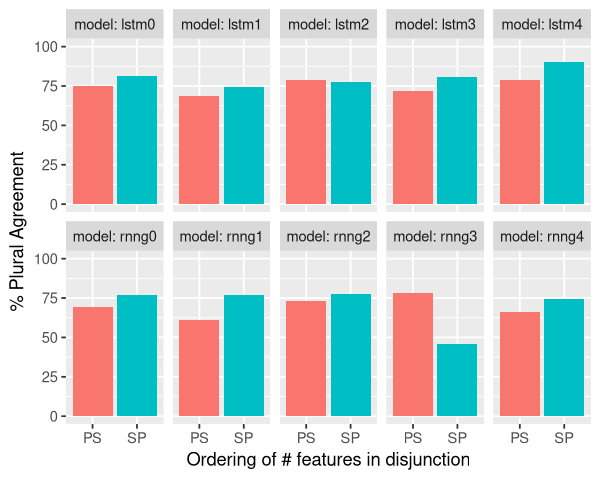

In [17]:
ggplot(hm_df, aes(x=condition, fill=condition, y=sample)) + 
geom_bar(stat="summary", position="dodge", fun.y = "mean") +
facet_wrap( ~ model, ncol=5, labeller = label_both) +

labs(x="Ordering of # features in disjunction", y="% Plural Agreement") +
theme(legend.position="none") +
ylim(0,100)
ggsave("Haskell_bymodel.png")

In [18]:
hm_lm <- glmmTMB(data=subset(hm_df, hm_df$type == "lstm"), 
                 sample/100 ~ condition  + (1|item) + (1 | model),
                family=beta_family())

summary(hm_lm)

hm_lm <- glmmTMB(data=subset(hm_df, hm_df$type == "rnng"), 
                  sample/100 ~ condition + (1 | item) + (1| model),
                  family=beta_family())

summary(hm_lm)

 Family: beta  ( logit )
Formula:          sample/100 ~ condition + (1 | item) + (1 | model)
Data: subset(hm_df, hm_df$type == "lstm")

     AIC      BIC   logLik deviance df.resid 
  -405.7   -385.7    207.8   -415.7      395 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.1840   0.4290  
 model  (Intercept) 0.0374   0.1934  
Number of obs: 400, groups:  item, 40; model, 5

Overdispersion parameter for beta family (): 5.11 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.02381    0.12624    8.11 5.05e-16 ***
conditionSP  0.37152    0.09061    4.10 4.13e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Family: beta  ( logit )
Formula:          sample/100 ~ condition + (1 | item) + (1 | model)
Data: subset(hm_df, hm_df$type == "rnng")

     AIC      BIC   logLik deviance df.resid 
    -316     -296      163     -326      395 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.325348 0.57039 
 model  (Intercept) 0.004647 0.06817 
Number of obs: 400, groups:  item, 40; model, 5

Overdispersion parameter for beta family (): 1.76 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.6927     0.1266   5.473 4.43e-08 ***
conditionSP   0.1054     0.1145   0.921    0.357    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Franck 2002

In [19]:
franck_df <- read.csv('../evalsets/Franck2002/items.csv.reformat')

franck_df <- tidyr::separate(franck_df, condition, c("subj", "inter", "local"), sep=1:3)
franck_df$sample <- 100 - franck_df$sample
franck_df$max <- 100 - franck_df$max

franck_df$inter_match <- franck_df$subj == franck_df$inter
franck_df$local_match <- franck_df$subj == franck_df$local
franck_df$type = substr(franck_df$model, 0, 4)

franck_lstm_df = subset(franck_df, substr(franck_df$model, 0,4) == "lstm")
franck_lstm_df$model <- droplevels(franck_lstm_df$model)
franck_rnng_df = subset(franck_df, substr(franck_df$model, 0,4) == "rnng")
franck_rnng_df$model <- droplevels(franck_rnng_df$model)
summary(franck_lstm_df)


       X               item           subj              inter          
 Min.   :   0.0   Min.   : 0.00   Length:1280        Length:1280       
 1st Qu.: 638.5   1st Qu.: 7.75   Class :character   Class :character  
 Median :1277.0   Median :15.50   Mode  :character   Mode  :character  
 Mean   :1277.0   Mean   :15.50                                        
 3rd Qu.:1915.5   3rd Qu.:23.25                                        
 Max.   :2554.0   Max.   :31.00                                        
    local             model          max              sample       
 Length:1280        lstm0:256   Min.   :  0.000   Min.   : 0.2238  
 Class :character   lstm1:256   1st Qu.:  0.000   1st Qu.: 4.0113  
 Mode  :character   lstm2:256   Median :  0.000   Median : 8.0540  
                    lstm3:256   Mean   :  1.797   Mean   :12.2707  
                    lstm4:256   3rd Qu.:  0.000   3rd Qu.:15.9255  
                                Max.   :100.000   Max.   :80.1224  
 inter_match     loc

In [20]:
means_lstm <- franck_lstm_df %>% group_by(model, inter_match, local_match) %>% summarize(sample = mean(sample), max = mean(max))
means_rnng <- franck_rnng_df %>% group_by(model, inter_match, local_match) %>% summarize(sample = mean(sample), max = mean(max))
means <- franck_df %>% group_by("Model Type"=type, "Subject #"=subj, 
                                "Intermediate Attractor #"=inter, 
                                "Local Attractor #"=local) %>% summarize("Sample" = mean(sample), "MaxProb"= mean(max))

means
print.xtable(xtable(means), file="FranckTable.tex", floating=FALSE)

Model Type,Subject #,Intermediate Attractor #,Local Attractor #,Sample,MaxProb
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
lstm,P,P,P,5.765182,0.000
lstm,P,P,S,11.922129,0.000
lstm,P,S,P,7.660365,0.000
lstm,P,S,S,15.803470,1.250
lstm,S,P,P,27.580941,9.375
lstm,S,P,S,6.039210,0.000
lstm,S,S,P,20.552686,3.750
lstm,S,S,S,2.841299,0.000
rnng,P,P,P,29.092262,28.125


Saving 6.67 x 6.67 in image


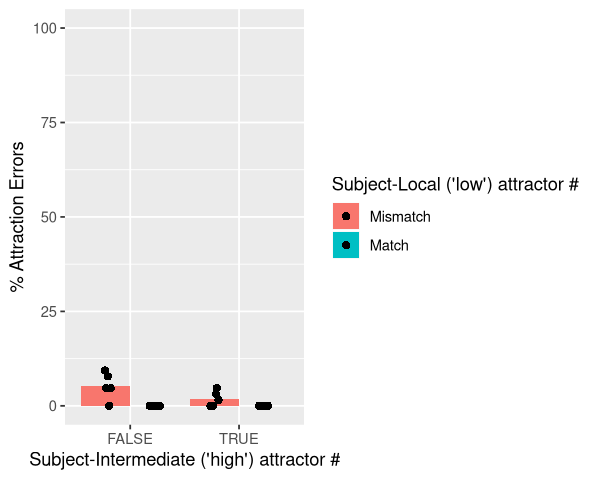

Saving 6.67 x 6.67 in image


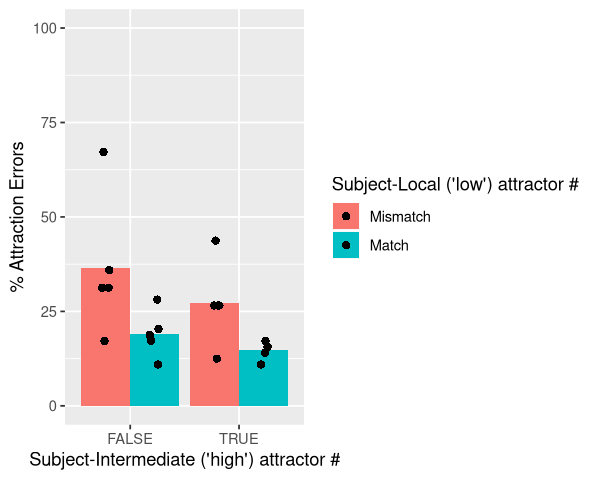

In [21]:
plt <- ggplot(franck_lstm_df, aes(x=inter_match, fill=local_match, y=max)) +
geom_bar(stat="summary", position="dodge", fun.y = "mean") + 
geom_point(data=means_lstm, shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.1, dodge.width=0.9)) + 
labs(x="Subject-Intermediate ('high') attractor #", 
     fill="Subject-Local ('low') attractor #", y="% Attraction Errors") +
scale_fill_hue(labels=c("Mismatch", "Match")) +
coord_cartesian(ylim=c(0,100))

plt

ggsave("Franck_max_lstm.png")

plt <- ggplot(franck_rnng_df, aes(x=inter_match, fill=local_match, y=max)) +
geom_bar(stat="summary", position="dodge", fun.y = "mean") + 
geom_point(data=means_rnng, shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.1, dodge.width=0.9)) + 
labs(x="Subject-Intermediate ('high') attractor #", 
     fill="Subject-Local ('low') attractor #", y="% Attraction Errors") +
scale_fill_hue(labels=c("Mismatch", "Match")) +
coord_cartesian(ylim=c(0,100))

plt

ggsave("Franck_max_rnng.png")

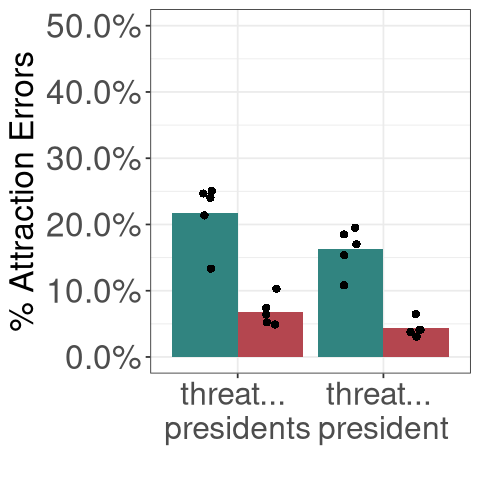

In [22]:
library(repr)
options(repr.plot.width=4, repr.plot.height=4)


plt <- ggplot(franck_lstm_df, aes(x=inter_match, fill=local_match, y=sample/100)) +
geom_bar(stat="summary", position="dodge", fun.y = "mean") + 
geom_point(data=means_lstm, shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.1, dodge.width=0.9)) + 
#stat_summary(fun.data = mean_se, geom = "errorbar", position="dodge", color="black") +
labs(x="", 
     fill="", y="% Attraction Errors") +
scale_fill_manual(labels=c("threat... \ncompanies", 
                        "threat... \ncompany"), values=pallete) +
scale_x_discrete(labels=c("threat... \npresidents", 
                          "threat... \npresident")) + 
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,0.5)) +
theme_bw() +
theme(axis.text.x=element_text(size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))
legend <- cowplot::get_legend(plt)
plt <- plt + theme(legend.position = "none") 

plt

ggsave("Franck_lstm.png", width = 4, height = 4)

png 
  2

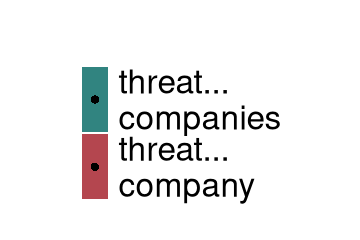

In [23]:
options(repr.plot.width=3, repr.plot.height=2)
grid.newpage()
png("franck_legend.png", width=3, height=2, units="in", res=300)
grid.draw(legend) 
dev.off()
grid.draw(legend)

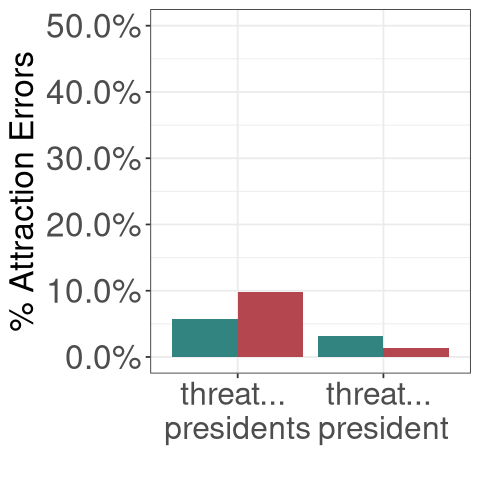

In [24]:
options(repr.plot.width=4, repr.plot.height=4)


franck_human <- data.frame(subj=rep(c("S","P"), each=4),
                           inter=rep(c("S", "S", "P", "P"), times=2),
                           local=rep(c("S", "P"), times=4),
                           err=c(1.3, 0, 9.8, 4.5, 5.8, 9.4, 3.1, 1.3)/100)

franck_human$inter_match <- franck_human$inter == franck_human$subj
franck_human$local_match <- franck_human$local == franck_human$subj


ggplot(franck_human, aes(x=inter_match, fill=local_match, y=err)) +
geom_bar(stat="identity", position="dodge") + 
labs(x="", 
     fill="", y="% Attraction Errors") +
theme(axis.text=element_text(size=10), strip.text=element_text(size=9), legend.text=element_text(size=10)) +
scale_fill_manual(labels=c("threat... \ncompanies", 
                        "threat... \ncompany"), values=pallete) +
scale_x_discrete(labels=c("threat... \npresidents", 
                          "threat... \npresident")) + 
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,0.5)) +
theme_bw() +
theme(axis.text.x=element_text(size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))+
theme(legend.position = 'none')

ggsave("Franck_human.png", width=4, height=4)

Saving 6.67 x 6.67 in image


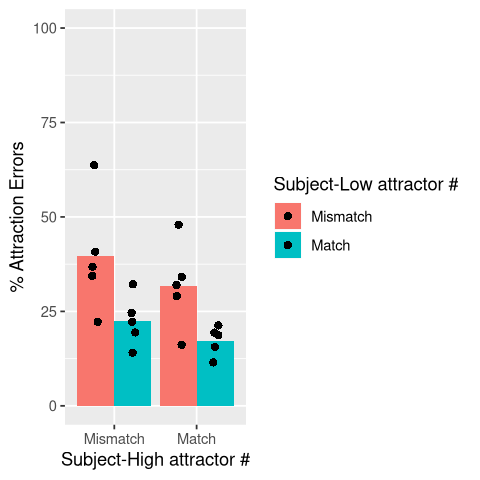

In [25]:

ggplot(franck_rnng_df, aes(x=inter_match, fill=local_match, y=sample)) + 
geom_bar(stat="summary", position="dodge", fun.y = "mean") + 
geom_point(data=means_rnng, shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.1, dodge.width=0.9)) + 
labs(x="Subject-High attractor #", 
     fill="Subject-Low attractor #", y="% Attraction Errors") +

scale_fill_hue(labels=c("Mismatch", "Match")) +
scale_x_discrete(labels=c("Mismatch", "Match")) + 
coord_cartesian(ylim=c(0,100))


ggsave("Franck_rnng.png")

Saving 6.67 x 6.67 in image


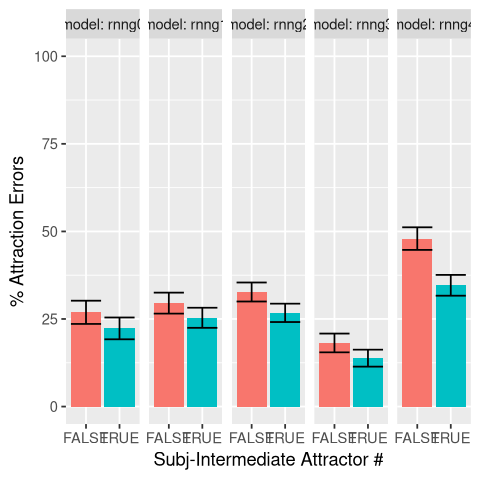

Saving 6.67 x 6.67 in image


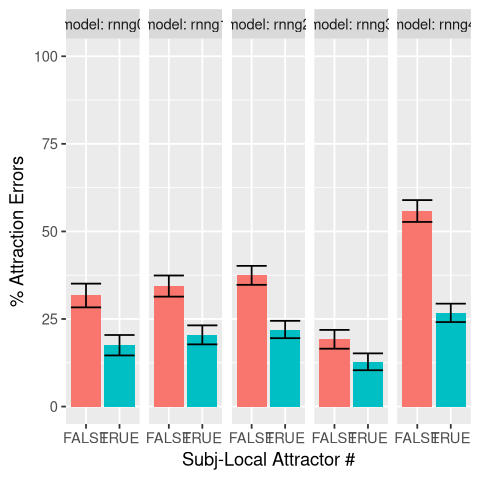

In [26]:
ggplot(franck_rnng_df, aes(x=inter_match, fill=inter_match, y=sample)) + 
geom_bar(stat="summary", position="dodge", fun.y = "mean") + 
stat_summary(fun.data = mean_se, geom = "errorbar", position="dodge") +
facet_grid( ~model, labeller = label_both) +
labs(x="Subj-Intermediate Attractor #", y="% Attraction Errors")+
theme(legend.position = "none") +
coord_cartesian(ylim=c(0,100))

ggsave("Franck_rnng_bymodel_inter.png")

ggplot(franck_rnng_df, aes(x=local_match, fill=local_match, y=sample)) + 
geom_bar(stat="summary", position="dodge", fun.y = "mean") + 
stat_summary(fun.data = mean_se, geom = "errorbar", position="dodge") +
facet_grid( ~model, labeller = label_both) +
labs(x="Subj-Local Attractor #", y="% Attraction Errors") +
theme(legend.position = "none") +
coord_cartesian(ylim=c(0,100))

ggsave("Franck_rnng_bymodel_local.png")


In [27]:
franck_lm <- glmmTMB(sample/100 ~ inter_match * local_match + (1 | item) 
                  + (1 | model), franck_lstm_df, 
                   family=beta_family())
summary(franck_lm)
lstm_eff <- summary(franck_lm)$coeff$cond[c("inter_matchTRUE", "local_matchTRUE"), 1]
lstm_se <- summary(franck_lm)$coeff$cond[c("inter_matchTRUE", "local_matchTRUE"), 2]

lstm_eff

 Family: beta  ( logit )
Formula:          
sample/100 ~ inter_match * local_match + (1 | item) + (1 | model)
Data: franck_lstm_df

     AIC      BIC   logLik deviance df.resid 
 -3537.6  -3501.5   1775.8  -3551.6     1273 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.08143  0.2854  
 model  (Intercept) 0.03246  0.1802  
Number of obs: 1280, groups:  item, 32; model, 5

Overdispersion parameter for beta family ():   18 

Conditional model:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -1.35763    0.09997 -13.581  < 2e-16 ***
inter_matchTRUE                 -0.33868    0.04531  -7.475 7.74e-14 ***
local_matchTRUE                 -1.14467    0.05273 -21.710  < 2e-16 ***
inter_matchTRUE:local_matchTRUE -0.02031    0.07629  -0.266     0.79    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

inter_matchTRUE local_matchTRUE 
     -0.3386798      -1.1446673

In [49]:
franck_lstm_df$cond <- paste0(factor(franck_lstm_df$inter_match), factor(franck_lstm_df$local_match))

franck_lm <- glmmTMB(sample/100 ~ cond + (1 | item) 
                  + (1 | model), franck_lstm_df, 
                   family=beta_family())

mat = matrix(c(1/4, 1/4, 1/4, 1/4, 0, 1, -1, 0), ncol = 4)
summary(franck_lm)


 Family: beta  ( logit )
Formula:          sample/100 ~ cond + (1 | item) + (1 | model)
Data: franck_lstm_df

     AIC      BIC   logLik deviance df.resid 
 -3537.6  -3501.5   1775.8  -3551.6     1273 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.08143  0.2854  
 model  (Intercept) 0.03246  0.1802  
Number of obs: 1280, groups:  item, 32; model, 5

Overdispersion parameter for beta family ():   18 

Conditional model:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -1.35763    0.09997 -13.581  < 2e-16 ***
condFALSETRUE -1.14467    0.05273 -21.710  < 2e-16 ***
condTRUEFALSE -0.33868    0.04531  -7.475 7.74e-14 ***
condTRUETRUE  -1.50366    0.05647 -26.627  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [28]:
summary(franck_lm)$coeff

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-1.35762572,0.09996582,-13.5808996,5.198398e-42
inter_matchTRUE,-0.33867976,0.04531059,-7.4746275,7.742285e-14
local_matchTRUE,-1.14466725,0.05272603,-21.7097197,1.660672e-104
inter_matchTRUE:local_matchTRUE,-0.02031286,0.07628970,-0.2662596,7.900393e-01


In [29]:
franck_lm <- glmmTMB(sample/100 ~ inter_match * local_match + (1 | item) 
                  + (1 | model), franck_rnng_df, 
                   family=beta_family())

summary(franck_lm)
rnng_eff <- summary(franck_lm)$coeff$cond[c("inter_matchTRUE", "local_matchTRUE"), 1]
rnng_se <- summary(franck_lm)$coeff$cond[c("inter_matchTRUE", "local_matchTRUE"), 2]

rnng_eff

eff = c(lstm_eff, rnng_eff)
eff

se = c(lstm_se, rnng_se)

 Family: beta  ( logit )
Formula:          
sample/100 ~ inter_match * local_match + (1 | item) + (1 | model)
Data: franck_rnng_df

     AIC      BIC   logLik deviance df.resid 
 -1820.2  -1784.1    917.1  -1834.2     1273 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.10598  0.3255  
 model  (Intercept) 0.09076  0.3013  
Number of obs: 1280, groups:  item, 32; model, 5

Overdispersion parameter for beta family (): 1.34 

Conditional model:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -0.28852    0.16093  -1.793  0.07299 .  
inter_matchTRUE                 -0.29194    0.09408  -3.103  0.00192 ** 
local_matchTRUE                 -0.72302    0.09412  -7.681 1.57e-14 ***
inter_matchTRUE:local_matchTRUE  0.07093    0.13161   0.539  0.58993    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

inter_matchTRUE local_matchTRUE 
     -0.2919410      -0.7230152

inter_matchTRUE local_matchTRUE inter_matchTRUE local_matchTRUE 
     -0.3386798      -1.1446673      -0.2919410      -0.7230152

model,attr,eff,se
<fct>,<fct>,<dbl>,<dbl>
LSTM,intermediate,-0.3386798,0.04531059
LSTM,local,-1.1446673,0.05272603


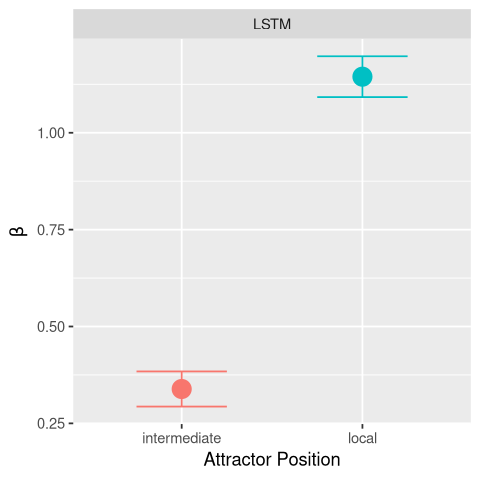

In [30]:
eff_df <- data.frame(model=c("LSTM", "LSTM", "RNNG", "RNNG"), attr=c("intermediate", "local", "intermediate", "local"), eff=eff, se=se)

eff_df <- subset(eff_df, model=="LSTM")
eff_df
ggplot(eff_df, aes(y=-eff, x = attr, color=attr)) + 
facet_grid( ~ model) +
geom_point(stat="identity", size=5) +
geom_errorbar(aes(ymax=-eff+se, ymin=-eff-se), width=0.5) +
theme(legend.position = "none") +
labs(y=expression(beta), x="Attractor Position") 

ggsave("Franck_effectsize.png", width=2.5, height=5)

# Humphreys & Bock 2005

In [31]:
hb_df <- read.csv("../evalsets/HumphreysBock2005/items.csv.reformat")
hb_df <- tidyr::separate(hb_df, condition, c("subj", "local", "prep"), sep=1:3)
hb_df$type <- substr(hb_df$model, 0, 4)
hb_df



X,item,subj,local,prep,model,max,sample,type
<int>,<int>,<chr>,<chr>,<chr>,<fct>,<int>,<dbl>,<chr>
0,0,C,P,D,lstm0,0,26.623113,lstm
1,0,C,P,D,lstm1,100,59.510610,lstm
2,0,C,P,D,lstm2,0,23.568203,lstm
3,0,C,P,D,lstm3,0,18.525685,lstm
4,0,C,P,D,lstm4,0,41.020219,lstm
5,0,C,P,D,rnng0,100,67.983203,rnng
6,0,C,P,D,rnng1,0,33.079314,rnng
7,0,C,P,D,rnng2,0,41.862998,rnng
8,0,C,P,D,rnng3,0,10.666201,rnng


In [32]:
output <- hb_df %>% group_by("Model Type"=type, "Subject #"=subj, "Local #"=local, "Notional Bias"=prep) %>% summarize("Sample"=mean(sample), "MaxProb"=mean(max))

output

print.xtable(xtable(output), file="HumphreysTable.txt", floating=FALSE)

Model Type,Subject #,Local #,Notional Bias,Sample,MaxProb
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
lstm,C,P,C,52.16882,52.222222
lstm,C,P,D,53.44875,55.555556
lstm,C,S,C,13.42295,3.333333
lstm,P,P,C,93.41671,98.888889
lstm,P,P,D,94.25065,98.888889
lstm,P,S,C,74.35583,87.777778
rnng,C,P,C,31.43854,26.666667
rnng,C,P,D,29.21996,22.222222
rnng,C,S,C,10.32087,4.444444


Saving 6.67 x 6.67 in image


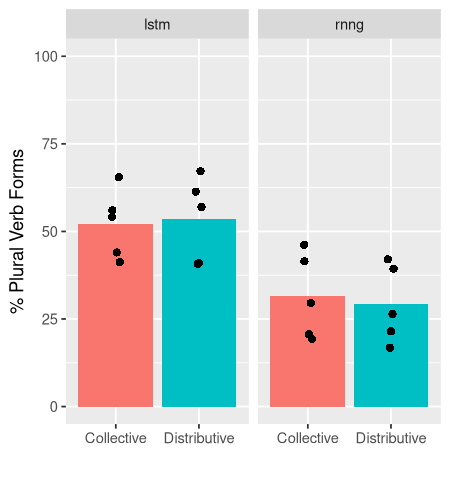

In [33]:
options(repr.plot.width=3.75, repr.plot.height=4)

hb_dist_df <- subset(hb_df, local == "P" & subj == "C")
means <- hb_dist_df %>% group_by(model, type, subj, prep) %>% summarize(sample = mean(sample), max = mean(max))


ggplot(data=hb_dist_df, aes(y=sample, x=prep, fill=prep)) +
geom_bar(stat="summary", position="dodge", fun.y = "mean") + 
geom_point(data=means, shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.1, dodge.width=0.9)) +
facet_grid(~type) +
scale_x_discrete(labels=c("Collective", "Distributive")) +
theme(legend.position="None") +
labs(y="% Plural Verb Forms", x = "", fill="Notional Reading Bias") +
ylim(0,100)
options(repr.plot.width=3.75, repr.plot.height=4)
ggsave("Humphreys_distrib.png")

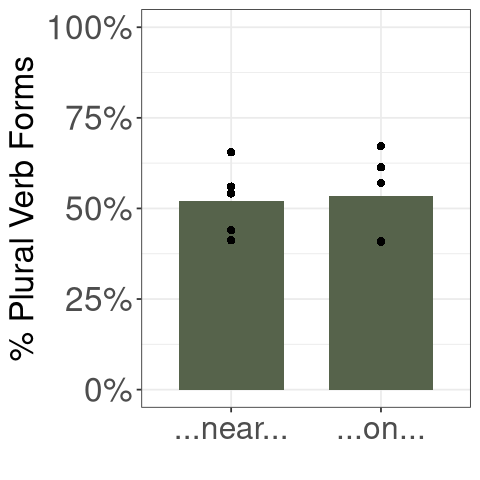

In [34]:
options(repr.plot.width=4, repr.plot.height=4)

hb_dist_df <- subset(hb_df, local == "P" & subj == "C")
means <- hb_dist_df %>% group_by(model, type, subj, prep) %>% summarize(sample = mean(sample), max = mean(max))
means <-subset(means, type=="lstm")

ggplot(data=subset(hb_dist_df, type=="lstm"), aes(y=sample/100, x=prep)) +
geom_bar(stat="summary", position="dodge", fun.y = "mean", fill="#56634b", width=0.7) + 
theme(axis.text=element_text(size=5), strip.text=element_text(size=4), legend.text=element_text(size=6)) +
geom_point(data=means, shape=16, size=2) +
scale_x_discrete(labels=c("...near...", 
                          "...on..." ))  +
labs(y="% Plural Verb Forms", x = "", fill="Notional Reading Bias") +
theme(axis.text=element_text(size=10), strip.text=element_text(size=9), axis.title.x=element_text(hjust=c(1)), legend.text=element_text(size=10)) +
theme(legend.position="None") +
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,1)) +
theme_bw() +
theme(axis.text.x=element_text(size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))

ggsave("Humphreys_lstm.png", width=5, height=4)

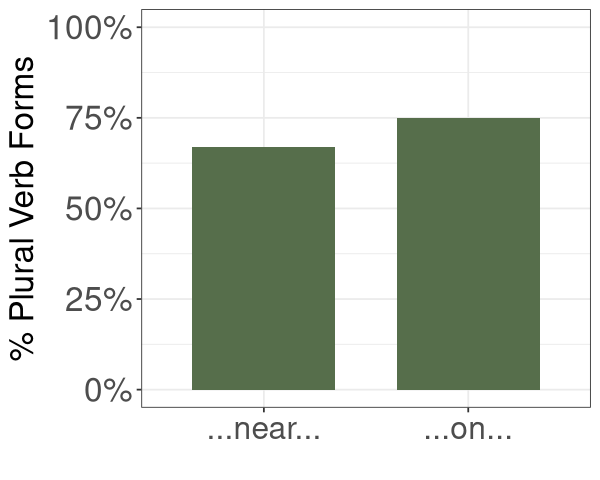

In [35]:
options(repr.plot.width=5, repr.plot.height=4)


hb_human <- data.frame(prep=c("Collective", "Distributive"),
                             plural=c(67,75)/100)

ggplot(data=hb_human, aes(y=plural, x=prep)) +
geom_bar(stat="identity", position="dodge", fill="#566e4b", width=0.7) + 
theme(legend.position="None") +
scale_x_discrete(labels=c("...near...", 
                          "...on..." ))  +
labs(y="% Plural Verb Forms", x = "", fill="Notional Reading Bias") +
theme(axis.text=element_text(size=16), strip.text=element_text(size=16), axis.title.x=element_text(hjust=c(-0)), legend.text=element_text(size=16)) +
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,1)) +

theme_bw() +
theme(axis.text.x=element_text(size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))
ggsave("Humphreys_human.png", width=5, height=4)

In [36]:
hb_lm <- glmmTMB(data=subset(hb_df, subj == "C" & local == "P" & type == "lstm"), 
                 sample/100 ~ prep + (1 | item) + (1 | model),
                family=beta_family())
summary(hb_lm)     
hb_lm <- glmmTMB(data=subset(hb_df, subj == "C" & local == "P" & type == "rnng"), 
                 sample/100 ~ prep + (1 | item) + (1 | model),
                family=beta_family())
summary(hb_lm)

 Family: beta  ( logit )
Formula:          sample/100 ~ prep + (1 | item) + (1 | model)
Data: subset(hb_df, subj == "C" & local == "P" & type == "lstm")

     AIC      BIC   logLik deviance df.resid 
  -157.9   -142.0     84.0   -167.9      175 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.4591   0.6775  
 model  (Intercept) 0.1806   0.4249  
Number of obs: 180, groups:  item, 18; model, 5

Overdispersion parameter for beta family (): 11.3 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.10202    0.25619   0.398    0.690
prepD        0.05942    0.08942   0.664    0.506

 Family: beta  ( logit )
Formula:          sample/100 ~ prep + (1 | item) + (1 | model)
Data: subset(hb_df, subj == "C" & local == "P" & type == "rnng")

     AIC      BIC   logLik deviance df.resid 
  -173.4   -157.4     91.7   -183.4      175 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.9643   0.982   
 model  (Intercept) 0.3158   0.562   
Number of obs: 180, groups:  item, 18; model, 5

Overdispersion parameter for beta family (): 4.86 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -0.84337    0.35489  -2.376   0.0175 *
prepD       -0.08819    0.13190  -0.669   0.5038  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Bock, Nicol, & Cutting 1999

In [153]:
bnc_df <- read.csv("../evalsets/Bock1999/items.csv.reformat")
bnc_df <- tidyr::separate(bnc_df, condition, c("subj", "attr", "-", "task"), sep=1:4)
bnc_df$match <- bnc_df$subj == bnc_df$attr
bnc_df$type <- substr(bnc_df$model, 0, 4)
bnc_df

X,item,subj,attr,-,task,model,max,sample,match,type
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<fct>,<int>,<dbl>,<lgl>,<chr>
0,0,s,s,(,v,lstm0,0,1.574750e+01,TRUE,lstm
1,0,s,s,(,v,lstm1,0,1.056869e+01,TRUE,lstm
2,0,s,s,(,v,lstm2,0,5.889144e+00,TRUE,lstm
3,0,s,s,(,v,lstm3,0,1.017118e+01,TRUE,lstm
4,0,s,s,(,v,lstm4,0,9.975081e+00,TRUE,lstm
5,0,s,s,(,v,rnng0,0,1.495945e-01,TRUE,rnng
6,0,s,s,(,v,rnng1,0,2.658923e+00,TRUE,rnng
7,0,s,s,(,v,rnng2,0,5.110092e+00,TRUE,rnng
8,0,s,s,(,v,rnng3,0,1.941697e+00,TRUE,rnng


In [154]:
output <- bnc_df %>% group_by("Model Type"=type, "Subject #"=subj, "Attractor #"=attr, "Task"=task) %>% summarize("Sample"=mean(sample), "MaxProb"=mean(max))

output
print.xtable(xtable(output), file="Bock99Table.tex", floating=FALSE)

Model Type,Subject #,Attractor #,Task,Sample,MaxProb
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
lstm,c,p,r,50.0939577,49.444444
lstm,c,p,t,42.0909162,31.111111
lstm,c,p,v,47.7809892,45.000000
lstm,c,s,r,31.3910156,19.444444
lstm,c,s,t,35.1929919,8.888889
lstm,c,s,v,16.6163986,6.666667
lstm,p,p,r,81.2282620,97.222222
lstm,p,p,t,52.2304691,60.555556
lstm,p,p,v,91.2696314,98.888889


Saving 6.67 x 6.67 in image


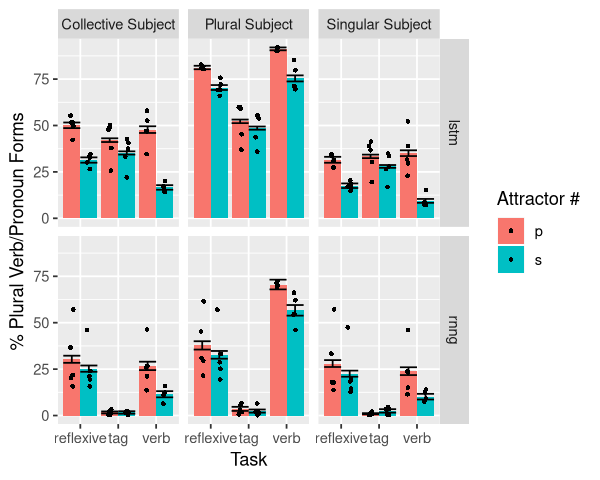

In [155]:
means <- bnc_df %>% group_by(model, type, attr, task, subj) %>% summarize(sample = mean(sample), max = mean(max))

ggplot(data=bnc_df, aes(x=task, y=sample, fill=attr)) +
geom_bar(stat="summary", position="dodge", fun.y = "mean") + 
geom_point(data=means, shape=16, size=1,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.1, dodge.width=0.9)) +
scale_x_discrete(labels=c("reflexive", "tag", "verb")) +
stat_summary(fun.data = mean_se, geom = "errorbar", position="dodge") +
facet_grid(type ~ subj, labeller=labeller(subj=c("c"="Collective Subject", "p"="Plural Subject", "s"="Singular Subject"),
                                          type=c("rnng"="rnng", "lstm"="lstm"))) +
labs(y="% Plural Verb/Pronoun Forms", x="Task", fill="Attractor #")

ggsave("Bock1999_all.png")

In [236]:
options(repr.plot.width=8, repr.plot.height=2.5)

means <- bnc_df %>% group_by(model, type, attr, task, subj) %>% summarize(sample = mean(sample), max = mean(max))

plt <- ggplot(data=subset(bnc_df, type=="lstm"), aes(x=task, y=sample/100, fill=attr)) +
geom_bar(stat="summary", position="dodge", fun.y = "mean") + 
scale_fill_manual(labels=c("...rivals...", 
                        "...rival..."), values=pallete) +
geom_point(data=subset(means, type=="lstm"), shape=16, size=1,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.1, dodge.width=0.9)) +
scale_x_discrete(labels=c("reflexive", "tag", "verb")) +
theme(axis.text=element_text(size=16), strip.text=element_text(size=9), axis.title.x=element_text(hjust=c(1)), legend.text=element_text(size=16)) +
facet_grid(~ subj, labeller=labeller(subj=c("c"="gang", "p"="gang leaders", "s"="gang leader"))) +
labs(y="% Plural Form", x="", fill="Attractor #") +
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,1)) +
theme_bw() +
theme(axis.text.x=element_text(angle=20, hjust=0.9, size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20)) 
legend <- cowplot::get_legend(plt)

plt <- plt + theme(legend.position = "none")

ggsave("Bock1999_all.png", width=8, height=2.5)

png 
  2

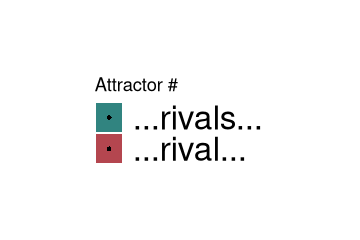

In [237]:
options(repr.plot.width=3, repr.plot.height=2)
grid.newpage()
png("bock99_legend.png", width=3, height=2, units="in", res=300)
grid.draw(legend) 
dev.off()
grid.draw(legend)

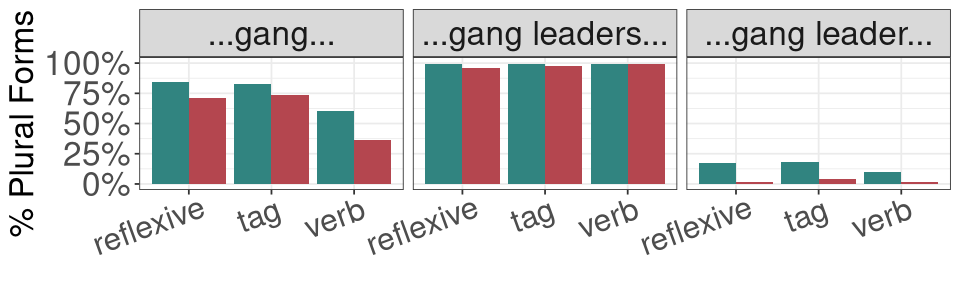

In [176]:
options(repr.plot.width=8, repr.plot.height=2.5)
bnc_human <- data.frame(task=rep(c("r", "t", "v"), each=6),
                        subj=rep(rep(c("S", "P", "C"), each=2), times=3),
                        attr=rep(c("S", "P"), times=9),
                        plural=c(2, 17, 96, 99, 71, 84, 4, 18, 98, 99, 74, 83, 2, 10, 99, 99, 36, 60)/100
                       )

ggplot(data=bnc_human, aes(x=task, y=plural, fill=attr)) +
scale_fill_manual(labels=c("...rivals...", 
                        "...rival..."), values=pallete) +
geom_bar(stat="identity", position="dodge") +
scale_x_discrete(labels=c("reflexive", "tag", "verb")) +
facet_grid(~subj, labeller=labeller(subj=c("C"="...gang...", "P"="...gang leaders...", "S"="...gang leader..."))) +
labs(y="% Plural Forms", x="", fill="Attractor #") +
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,1)) +
theme_bw() +
theme(axis.text.x=element_text(angle=20, hjust=0.9, size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20)) +
theme(legend.position = "none")
ggsave("Bock99_human.png", width=8, height=2.5)


In [ ]:
bnc_lm <- glmmTMB(data=subset(bnc_df, type=="lstm"), 
                  sample/100 ~ subj * attr * task + (1  | item),
                 family=beta_family())
summary(bnc_lm)
bnc_lm <- glmmTMB(data=subset(bnc_df, type=="rnng"), 
               sample/100 ~ subj * attr * task + (1 | item),
              family=beta_family())
summary(bnc_lm)

# Parker & An

In [37]:
pa_df <- read.csv("../evalsets/ParkerAn2018/items.csv.reformat")
pa_df$type <- substr(pa_df$model,0, 4)
pa_df$max <- 100 - pa_df$max
pa_df$sample <- 100 - pa_df$sample

pa_df <- tidyr::separate(pa_df, condition, c("argument", "attr"), sep="_")
pa_df

X,item,argument,attr,model,max,sample,type
<int>,<int>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<chr>
0,0,OBLIQUE,S,lstm0,0,3.31628564,lstm
1,0,OBLIQUE,S,lstm1,0,9.06141566,lstm
2,0,OBLIQUE,S,lstm2,0,1.08117456,lstm
3,0,OBLIQUE,S,lstm3,0,17.73922943,lstm
4,0,OBLIQUE,S,lstm4,0,5.44433390,lstm
5,0,OBLIQUE,S,rnng0,0,0.07557076,rnng
6,0,OBLIQUE,S,rnng1,100,57.96654049,rnng
7,0,OBLIQUE,S,rnng2,0,0.46357996,rnng
8,0,OBLIQUE,S,rnng3,0,1.33157833,rnng


In [38]:
output <- pa_df %>% group_by("Model Type"=type, "Attractor #"=attr, "Argument Type"=argument) %>% summarize("Sample"=mean(sample), "MaxProb"=mean(max))

output 

print.xtable(xtable(output), file="ParkerTable.txt", floating=FALSE)

Model Type,Attractor #,Argument Type,Sample,MaxProb
<chr>,<chr>,<chr>,<dbl>,<dbl>
lstm,P,CORE,10.490927,0.8333333
lstm,P,OBLIQUE,11.493457,5.0000000
lstm,S,CORE,4.033476,0.4166667
lstm,S,OBLIQUE,4.303417,0.4166667
rnng,P,CORE,24.692813,18.3333333
rnng,P,OBLIQUE,24.571516,20.0000000
rnng,S,CORE,14.732991,9.5833333
rnng,S,OBLIQUE,18.307162,11.6666667


Saving 6.67 x 6.67 in image


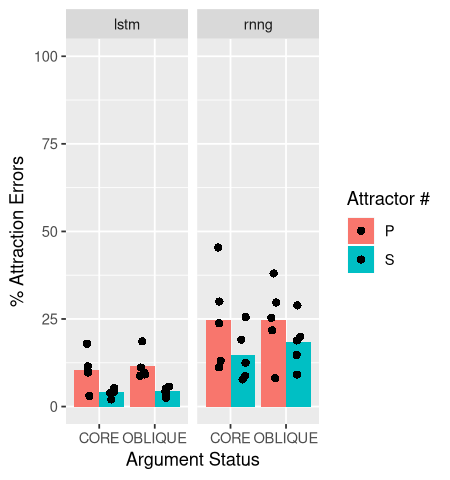

In [39]:
options(repr.plot.width=3.75, repr.plot.height=4)

means <- pa_df %>% group_by(model, type, argument, attr) %>% summarize(sample = mean(sample), max = mean(max))

ggplot(data=pa_df, aes(y=sample, x=argument, fill=attr)) +
geom_bar(stat="summary", position="dodge", fun.y = "mean") + 
geom_point(data=means, shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.1, dodge.width=0.9)) +
labs(y="% Attraction Errors", x = "Argument Status", fill="Attractor #") +
facet_grid( ~ type) +
ylim(0,100)

ggsave("Parker_prod.png")

In [40]:
pa_lm <- glmmTMB(data=(subset(pa_df, type = "rnng")), 
                 sample/100 ~ attr * argument + (1 | item) + (1 | model),
                family=beta_family())
summary(pa_lm)
              
pa_lm <- glmmTMB(data=(subset(pa_df, type = "lstm")), 
                 sample/100 ~ attr * argument + (1 | item) + (1 | model),
                family=beta_family())
summary(pa_lm)

 Family: beta  ( logit )
Formula:          sample/100 ~ attr * argument + (1 | item) + (1 | model)
Data: (subset(pa_df, type = "rnng"))

     AIC      BIC   logLik deviance df.resid 
 -4370.0  -4331.1   2192.0  -4384.0     1913 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.03803  0.1950  
 model  (Intercept) 0.09955  0.3155  
Number of obs: 1920, groups:  item, 48; model, 10

Overdispersion parameter for beta family ():  2.5 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -1.33344    0.11538 -11.557  < 2e-16 ***
attrS                 -0.45189    0.06833  -6.613 3.76e-11 ***
argumentOBLIQUE       -0.06434    0.06807  -0.945    0.345    
attrS:argumentOBLIQUE  0.08015    0.09649   0.831    0.406    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Family: beta  ( logit )
Formula:          sample/100 ~ attr * argument + (1 | item) + (1 | model)
Data: (subset(pa_df, type = "lstm"))

     AIC      BIC   logLik deviance df.resid 
 -4370.0  -4331.1   2192.0  -4384.0     1913 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.03803  0.1950  
 model  (Intercept) 0.09955  0.3155  
Number of obs: 1920, groups:  item, 48; model, 10

Overdispersion parameter for beta family ():  2.5 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -1.33344    0.11538 -11.557  < 2e-16 ***
attrS                 -0.45189    0.06833  -6.613 3.76e-11 ***
argumentOBLIQUE       -0.06434    0.06807  -0.945    0.345    
attrS:argumentOBLIQUE  0.08015    0.09649   0.831    0.406    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [41]:
pac_df <- read.csv("../evalsets/ParkerAn2018/items.comp.csv.reformatc")
pac_df$type <- substr(pac_df$model,0, 4)
pac_df$surp <- abs(pac_df$surp)
pac_df$avg_surp <- pac_df$surp/pac_df$len
pac_df <- tidyr::separate(pac_df, condition, c("argument", "attr", "gram"), sep="_")
pac_df


X,item,argument,attr,gram,model,surp,len,type,avg_surp
<int>,<int>,<chr>,<chr>,<chr>,<fct>,<dbl>,<int>,<chr>,<dbl>
0,0,OBLIQUE,S,G,lstm0,72.95304,14,lstm,5.210932
1,0,OBLIQUE,S,G,lstm1,75.28445,14,lstm,5.377461
2,0,OBLIQUE,S,G,lstm2,73.19387,14,lstm,5.228134
3,0,OBLIQUE,S,G,lstm3,74.38224,14,lstm,5.313017
4,0,OBLIQUE,S,G,lstm4,74.83125,14,lstm,5.345089
5,0,OBLIQUE,S,G,rnng0,103.33700,14,rnng,7.381214
6,0,OBLIQUE,S,G,rnng1,104.08100,14,rnng,7.434357
7,0,OBLIQUE,S,G,rnng2,103.04900,14,rnng,7.360643
8,0,OBLIQUE,S,G,rnng3,102.60700,14,rnng,7.329071


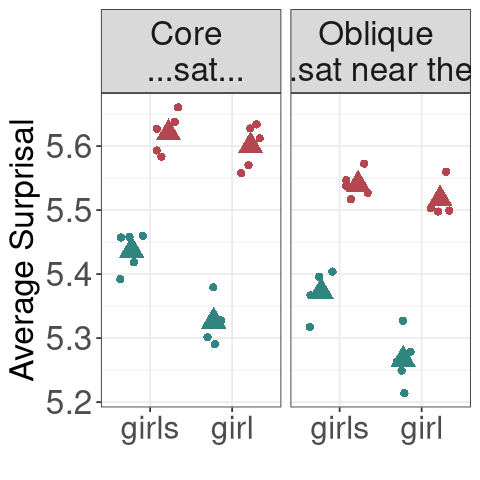

In [42]:
options(repr.plot.width=4, repr.plot.height=4)

means <- pac_df %>% group_by(model, type, argument, attr, gram) %>% summarize(avg_surp = mean(avg_surp))


plt <- ggplot(data=subset(pac_df, type=="lstm"), aes(y=avg_surp, x=attr, color=gram)) +
geom_point(stat="summary", position=position_dodge(width=0.9), fun.y = "mean", size=5, shape="triangle") + 
geom_point(data=subset(means, type=="lstm"), shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.3, dodge.width=0.9)) +
labs(y="Average Surprisal", x = "", color="") +
scale_color_manual(labels=c("Grammatical \n .. was unhappy.", "Ungrammatical \n ...were unhappy."), values=pallete) +
scale_x_discrete(labels=c("girls", "girl")) + 
facet_grid(~ argument, labeller=labeller(argument=c(CORE="Core \n ...sat...",
                                                    OBLIQUE="Oblique \n ...sat near the..."))) +
theme_bw() +
theme(axis.text.x=element_text( size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20)) 
legend <- cowplot::get_legend(plt)

plt <- plt + theme(legend.position = "none")
plt
ggsave("Parker_lstm.png", width=4, height=4)

png 
  2

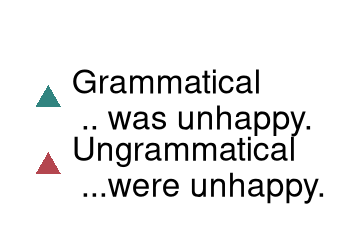

In [43]:
options(repr.plot.width=3, repr.plot.height=2)
grid.newpage()
png("parker_legend.png", width=3, height=2, units="in", res=300)
grid.draw(legend) 
dev.off()
grid.draw(legend)

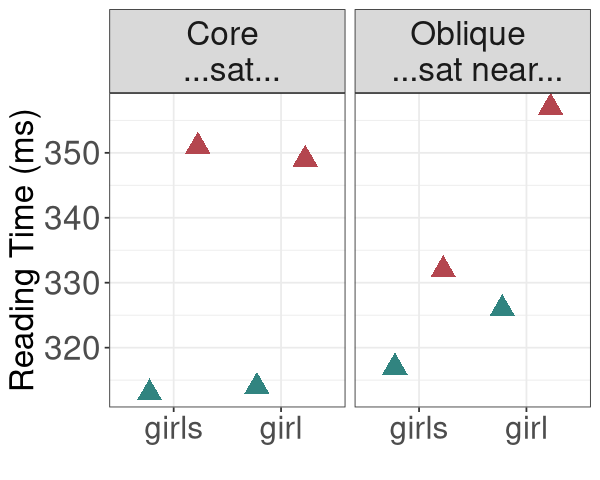

In [201]:
options(repr.plot.width=5, repr.plot.height=4)


pa_human <- data.frame(argument=rep(c("core", "oblique"), each=4),
                           gram=rep(rep(c("G", "U"), each=2), times=2),
                           attr=rep(c("P", "S"), times=4),
                           rt=c(313,314,351,349,317,326,332,357)
                           )



ggplot(data=pa_human, aes(y=rt, x=attr, color=gram)) +
geom_point(stat="identity", position=position_dodge(width=0.9), size=5, shape="triangle") +
labs(y="Reading Time (ms)", x = "", color="") +
scale_color_manual(labels=c("Grammatical \n .. was unhappy.", "Ungrammatical \n ...were unhappy."), values=pallete) +
scale_x_discrete(labels=c("girls", "girl")) + 
facet_grid(~ argument, labeller=labeller(argument=c(core="Core \n ...sat...",
                                                    oblique="Oblique \n ...sat near..."))) +
theme_bw() +
theme(axis.text.x=element_text( size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20)) +
theme(legend.position="None") 

ggsave("Parker_human.png", width=4, height=4)

# Wagers2009 Baseline

In [ ]:
w1_df <- read.csv("../evalsets/Wagers2009/1_Baseline/items.csv.reformatc")

w1_df <- tidyr::separate(w1_df, condition, c("subj", "gram"), sep=1:2)
w1_df$surp <- abs(w1_df$surp)
w1_df$surp <- w1_df$surp/w1_df$len
w1_df$type <- substr(w1_df$model, 0, 4)
w1_df

In [ ]:
output <- w1_df %>% group_by("Model Type"=type, "Subject #"=subj, "Grammaticality"=gram) %>% summarize("Average Surprisal"=mean(surp))

output 

print.xtable(xtable(output), file="WagersBaselineTable.txt", floating=FALSE)

In [ ]:
means <- w1_df %>% group_by(model, subj, gram, type) %>% summarize(surp = mean(surp))


ggplot(data=w1_df, aes(y=surp, x=subj, color=gram)) +
geom_point(stat="summary", position=position_dodge(width=0.9), fun.y = "mean", size=5, shape="triangle") + 
geom_point(data=means, shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.3, dodge.width=0.9)) +
labs(y="Total Surprisal", x = "Subject #", color="Grammaticality") +
scale_color_hue(labels=c("Grammatical", "Ungrammatical")) +
facet_grid(~ type)
ggsave("Wagers_baseline.png")

In [ ]:
w1_lm <- lmer(data=subset(w1_df, type=="lstm"), surp ~ subj * gram + (subj*gram | item) + (subj*gram| model)
)
summary(w1_lm)

w1_lm <- lmer(data=subset(w1_df, type=="rnng"), surp ~ subj * gram + (subj*gram | item) + (subj*gram| model)
)
summary(w1_lm)

# Wagers2009 Illusion/Outer Attraction

In [205]:
w3_df <- read.csv("../evalsets/Wagers2009/23_illusion/items.csv.reformatc")

w3_df <- tidyr::separate(w3_df, condition, c("subj", "attr", "gram"), sep=1:3)
w3_df$surp <- abs(w3_df$surp)/w3_df$len
w3_df$type <- substr(w3_df$model, 0, 4)
w3_df$subj <- as.factor(w3_df$subj)
w3_df$match <- w3_df$subj == w3_df$attr
w3_df$match_v <- ifelse(w3_df$gram == "G", w3_df$match, ! w3_df$match)
w3_df

summary(w3_df)

X,item,subj,attr,gram,model,surp,len,type,match,match_v
<int>,<int>,<fct>,<chr>,<chr>,<fct>,<dbl>,<int>,<chr>,<lgl>,<lgl>
0,0,S,S,U,lstm0,6.430380,16,lstm,TRUE,FALSE
1,0,S,S,U,lstm1,6.574877,16,lstm,TRUE,FALSE
2,0,S,S,U,lstm2,6.561540,16,lstm,TRUE,FALSE
3,0,S,S,U,lstm3,6.635904,16,lstm,TRUE,FALSE
4,0,S,S,U,lstm4,6.791419,16,lstm,TRUE,FALSE
5,0,S,S,U,rnng0,8.580375,16,rnng,TRUE,FALSE
6,0,S,S,U,rnng1,8.441313,16,rnng,TRUE,FALSE
7,0,S,S,U,rnng2,8.282813,16,rnng,TRUE,FALSE
8,0,S,S,U,rnng3,8.402938,16,rnng,TRUE,FALSE


       X               item       subj         attr          
 Min.   :   0.0   Min.   : 0.00   P:1920   Length:3840       
 1st Qu.: 959.8   1st Qu.:11.75   S:1920   Class :character  
 Median :1919.5   Median :23.50            Mode  :character  
 Mean   :1919.5   Mean   :23.50                              
 3rd Qu.:2879.2   3rd Qu.:35.25                              
 Max.   :3839.0   Max.   :47.00                              
                                                             
     gram               model           surp             len      
 Length:3840        lstm0  : 384   Min.   : 4.541   Min.   :12.0  
 Class :character   lstm1  : 384   1st Qu.: 6.210   1st Qu.:15.0  
 Mode  :character   lstm2  : 384   Median : 7.102   Median :15.0  
                    lstm3  : 384   Mean   : 7.268   Mean   :15.7  
                    lstm4  : 384   3rd Qu.: 8.275   3rd Qu.:17.0  
                    rnng0  : 384   Max.   :11.480   Max.   :20.0  
                    (Other):1536   

In [206]:
output <- w3_df %>% group_by("Model Type"=type, "Subject #"=subj, "Attractor #"=attr, "Grammaticality"=gram) %>% summarize("Average Surprisal"=mean(surp))

output 

print.xtable(xtable(output), file="WagersIllusionTable.txt", floating=FALSE)

Model Type,Subject #,Attractor #,Grammaticality,Average Surprisal
<chr>,<fct>,<chr>,<chr>,<dbl>
lstm,P,P,G,6.146243
lstm,P,P,U,6.339080
lstm,P,S,G,6.205286
lstm,P,S,U,6.304527
lstm,S,P,G,6.207284
lstm,S,P,U,6.232680
lstm,S,S,G,6.184303
lstm,S,S,U,6.369284
rnng,P,P,G,8.045495


Saving 6.67 x 6.67 in image


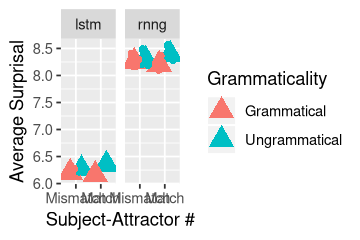

In [207]:
means <- w3_df %>% group_by(model, gram, match, type) %>% summarize(surp = mean(surp))

ggplot(data=w3_df, aes(y=surp, x=match, color=gram)) +
geom_point(stat="summary", position=position_dodge(width=0.9), fun.y = "mean", size=5, shape="triangle") + 
geom_point(data=means, shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.3, dodge.width=0.9)) +
labs(y="Average Surprisal", x = "Subject-Attractor #", color="Grammaticality") +
scale_color_hue(labels=c("Grammatical", "Ungrammatical")) +
scale_x_discrete(labels=c("Mismatch", "Match")) +
facet_grid(~type)
ggsave("Wagers_illusion-attr.png")


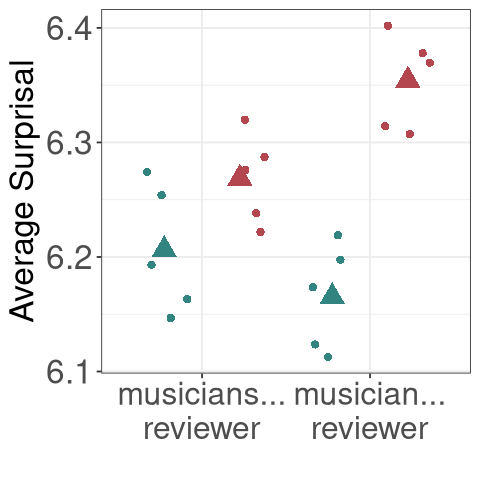

In [218]:
options(repr.plot.width=4, repr.plot.height=4)

means <- w3_df %>% group_by(model, gram, match, type) %>% summarize(surp = mean(surp))

plt <- ggplot(data=subset(w3_df, type=="lstm"), aes(y=surp, x=match, color=gram)) +
geom_point(stat="summary", position=position_dodge(width=0.9), fun.y = "mean", size=5, shape="triangle") + 
geom_point(data=subset(means, type=="lstm"), shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.3, dodge.width=0.9)) +
labs(y="Average Surprisal", x = "", color="") +
scale_color_manual(labels=c("Grammatical \n ...praises...",
                          "Ungrammatical \n ...praise..."), values=pallete) +
scale_x_discrete(labels=c("musicians...\nreviewer",
                          "musician...\nreviewer")) +
theme_bw() +
theme(axis.text.x=element_text( size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20)) 
legend <- cowplot::get_legend(plt)
plt <- plt + theme(legend.position="none")
plt
ggsave("Wagers_lstm.png", width=4, height=4)


png 
  2

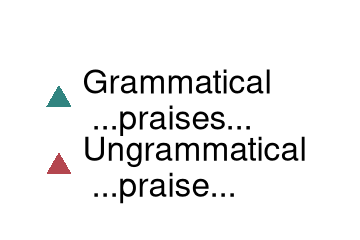

In [224]:
options(repr.plot.width=3, repr.plot.height=2)
grid.newpage()
png("wagers_legend.png", width=3, height=2, units="in", res=300)
grid.draw(legend) 
dev.off()
grid.draw(legend)

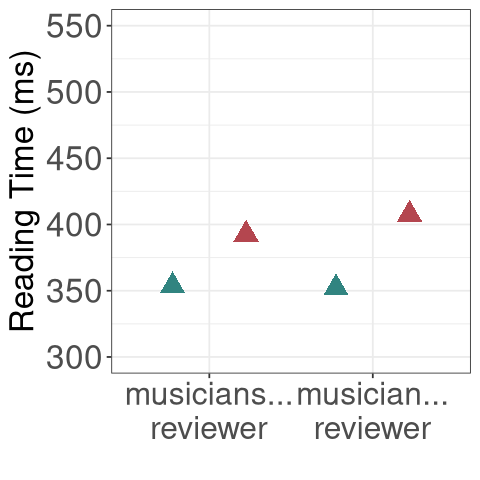

In [223]:
options(repr.plot.width=4, repr.plot.height=4)

w3_human <- data.frame(subj=rep(c("S", "P"), each=4),
                       gram=rep(rep(c("G", "U"), each=2), times=2),
                       attr=rep(c('S', 'P'), times=4),
                       rt=c(348,353,415,377, 354, 356, 408, 400)
                       )
w3_human$match <- w3_human$subj == w3_human$attr

ggplot(data=w3_human, aes(y=rt, x=match, color=gram)) +
theme_bw() +
stat_summary(geom="point", position=position_dodge(width=0.9), size=5, shape="triangle", fun.y=mean) + 
labs(y="Reading Time (ms)", x = "", color="") +
scale_color_manual(labels=c("Grammatical \n ...praises...",
                          "Ungrammatical \n ...praise..."), values=pallete) +
scale_x_discrete(labels=c("musicians...\nreviewer",
                          "musician...\nreviewer")) +
theme_bw() +
theme(axis.text.x=element_text( size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20), legend.position="none") +
ylim(300, 550) +
theme(legend.position="None") 

ggsave("Wagers_human.png", width=4, height=4)

In [ ]:
w3_lm <- lmer(data=subset(w3_df, type=="lstm" & gram=="U"), 
              surp ~ match + (subj * match  || item))

summary(w3_lm)
w3_lm <- lmer(data=subset(w3_df, type=="lstm" & gram=="G"), 
              surp ~ match + (subj * match  || item))

summary(w3_lm)

w3_lm <- lmer(data=subset(w3_df, type=="rnng" & gram=="U"), 
              surp ~  match  + (subj * match  || item))

summary(w3_lm)

w3_lm <- lmer(data=subset(w3_df, type=="lstm"), 
              surp ~ gram * match_v + (subj * match_v * gram || item))

summary(w3_lm)
w3_lm <- lmer(data=subset(w3_df, type=="rnng"), 
              surp ~  match * gram+ (subj * match * gram|| item))

summary(w3_lm)

# Human data 